# Radiation modes of slab waveguide

Again for the simple 3 layer structure: cladding-core-cladding.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex, plot_complex_contour
from scipy.optimize import newton
from IPython.display import Video
plt.style.use('dark_background')
%matplotlib widget


In [2]:
A = SlabExact(ns=[1.1, 1.5, 1.1], Ts=[6,2,6], xrefs=[800,200,800], symmetric=True)

In [3]:
ft = 'TE'
mt = 'radiation'
pm = True

In [4]:
Z = .4 * A.Z_evanescent.real

F = A.fields(Z, mode_type=mt)
Fm = A.fields(-Z, mode_type=mt)

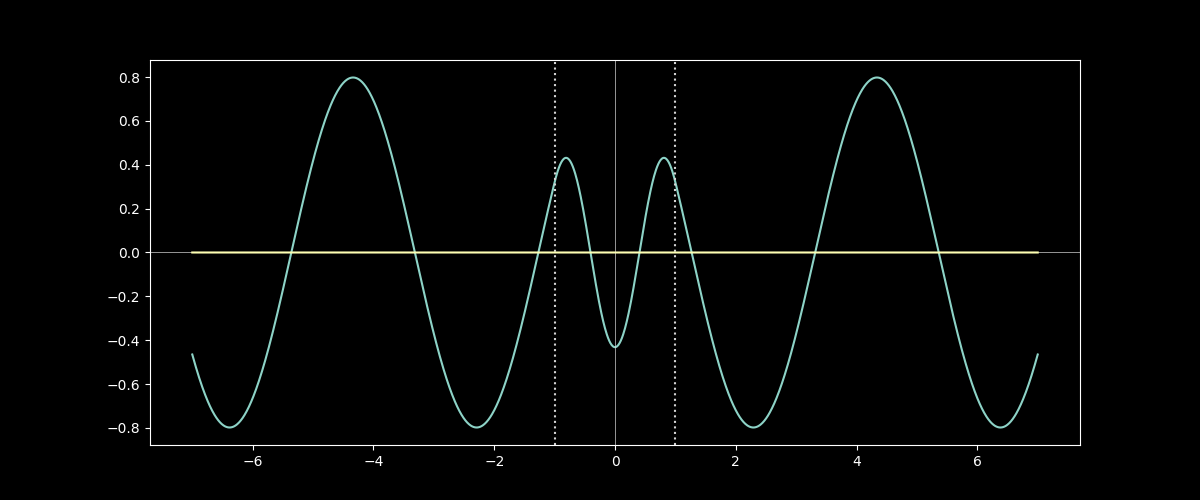

In [5]:
A.plot_field_1d(F)
A.add_1d_plot(F, part='imag')

## It appears F(-Z.conj()) = F(Z).conj()

In [6]:
zs = np.linspace(0, 8, 200)
xs = np.linspace(-6, 6, 140)

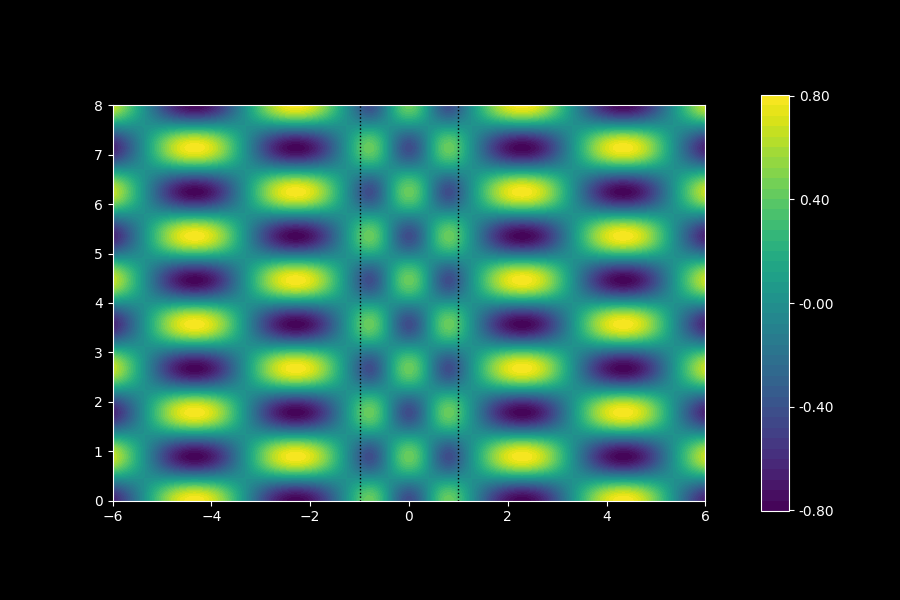

In [7]:
A.plot_field_2d(F, xs=xs, zs=zs);


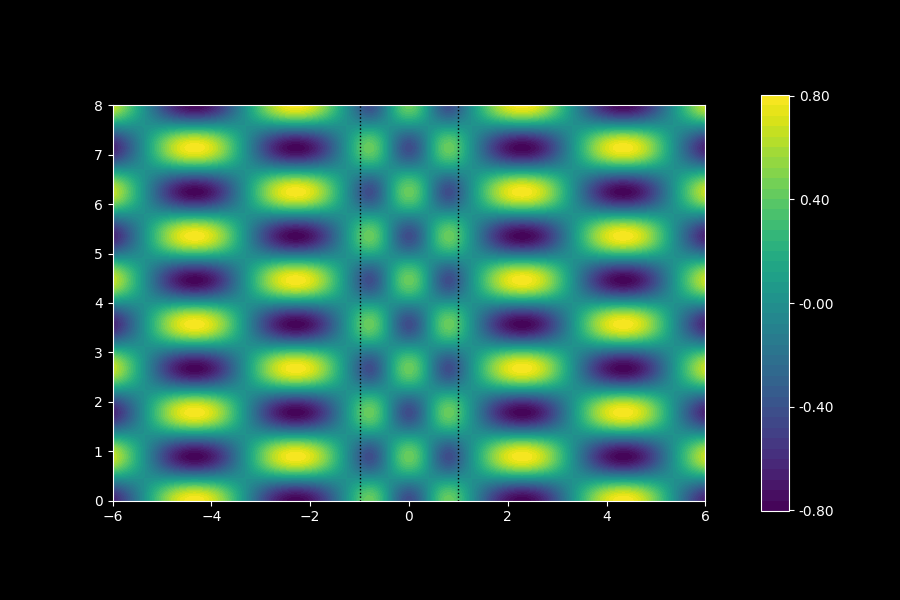

In [8]:
A.plot_field_2d(lambda x, z: Fm(x, zs=z).conj(), xs=xs, zs=zs);


## Actually that's only at z=0.

But in terms of extending integration that may be all we need.

Indeed all we need is observation that for real Z, F(Z) = F(-Z) (when coefficients are conjugate in each oscillatory region).

In [18]:
F = A.fields(-2, mode_type=mt, manual_coeffs=np.array([1,0]))


In [19]:
zs = np.linspace(0, 8, 200)
xs = np.linspace(-6, 6, 140)
fs = F(xs)
z0s = np.zeros_like(xs)

lenz, lenx = np.ptp(zs), np.ptp(xs)
figsize = 1/max(lenz, lenx)* np.array([lenx, lenz])*11

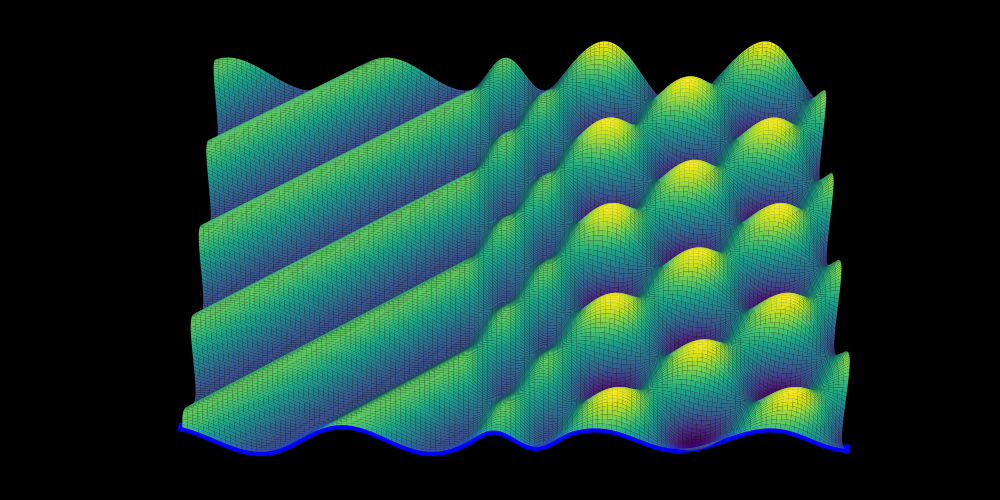

In [20]:
fig, ax = A.plot_field_2d_surface(F, xs=xs, zs=zs, cstride=1, rstride=1, elev=60)
ax.plot(xs, z0s, fs.real, linewidth=6, clip_on=False, color='b');


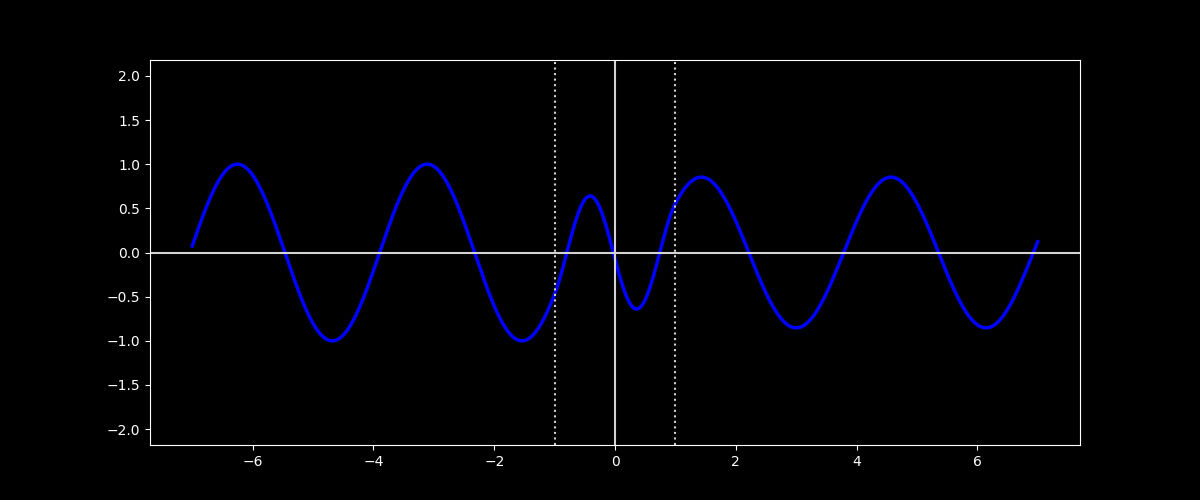

In [21]:
A.animate_field_1d(F, 'radiation_traveling', secs=4, fps=25, linewidth=2.5)

In [22]:
Video('radiation_traveling'+'.mp4', html_attributes="controls loop")


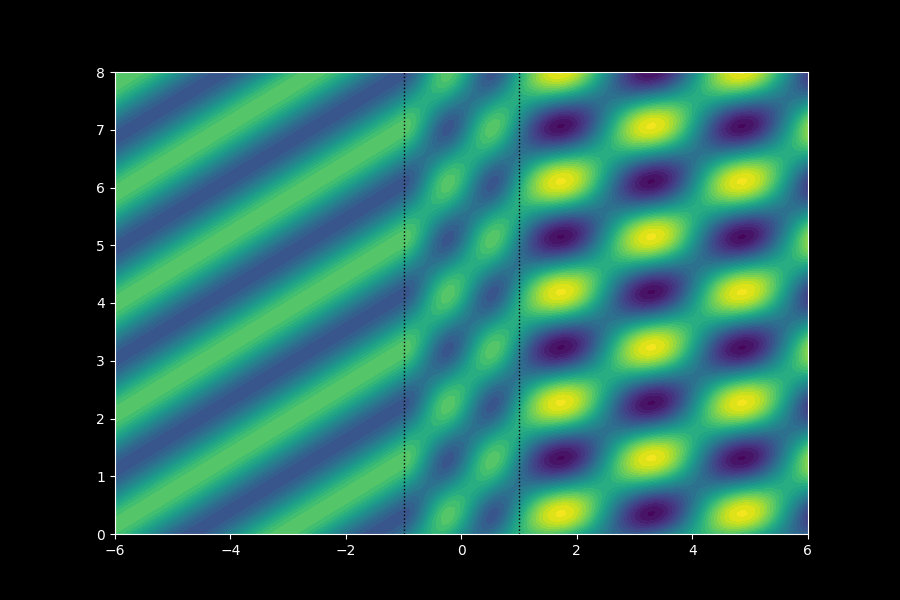

In [23]:
A.animate_field_2d(F, '2dradmode_traveling', xs=xs, zs=zs, secs=2.5)

In [24]:
Video('2dradmode_traveling'+'.mp4', html_attributes="controls loop")


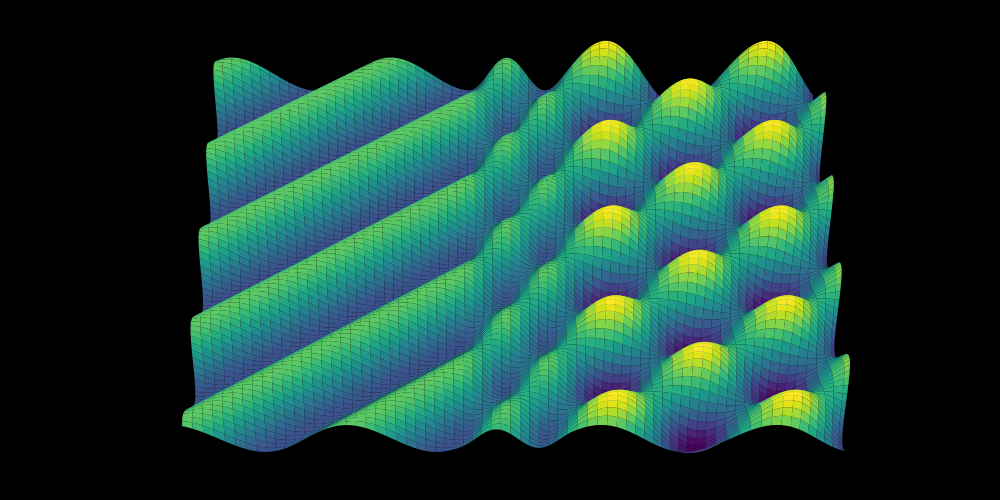

In [25]:
A.animate_field_2d_surface(F, '3dradmode', fps=15, secs=2.5, xs=xs, zs=zs, rstride=2, cstride=2, elev=60)

In [26]:
Video('3dradmode'+'.mp4', html_attributes="controls loop")


TypeError: SlabExact.fields() got an unexpected keyword argument 'c0'

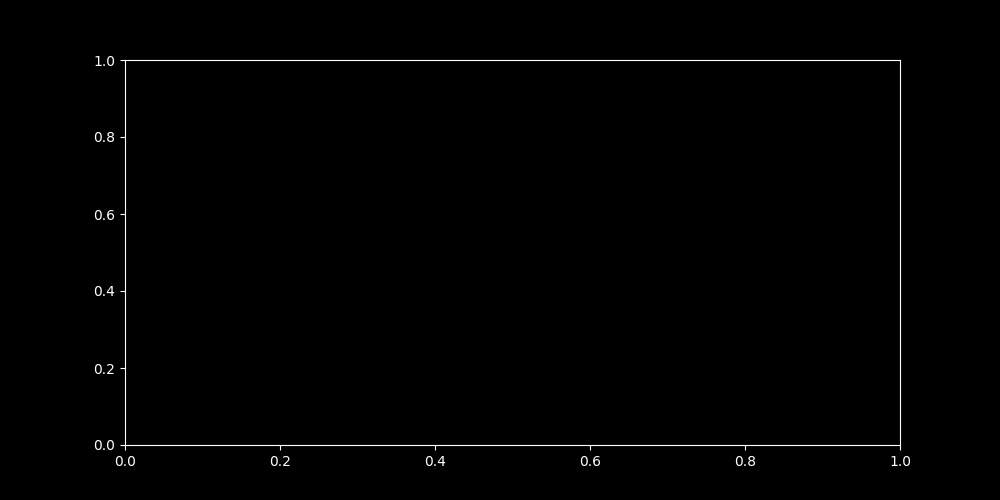

In [27]:
A.radiation_mode_beta_animation('beta_animation', figsize=(10,5), fps=32, secs=3, sign='-1')

In [23]:
from IPython.display import HTML


HTML("""
<video alt="test" controls id="theVideo">
        <source src="beta_animation.mp4" type="video/mp4">
</video>

<script>
video = document.getElementById("theVideo")
video.playbackRate = .5;
video.autoplay = true;
video.loop = false;
</script>
""")

/home/pv/local/slab/slab.py:431: RuntimeWarning: invalid value encountered in divide
  base = Z0 / Zd
/home/pv/local/slab/slab.py:543: RuntimeWarning: invalid value encountered in divide
  M0 *= np.sqrt(2/np.pi) * 1 / factor2


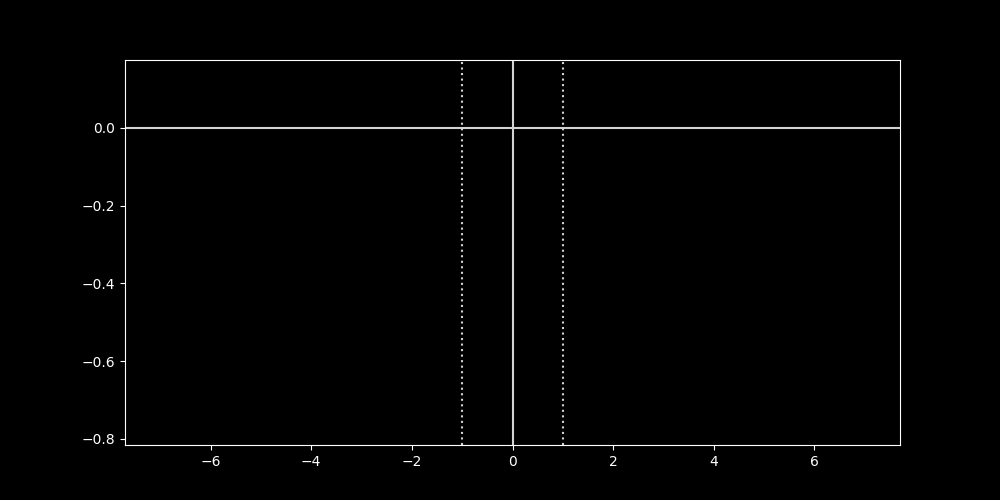

In [25]:
A.radiation_mode_beta_animation('beta_animation_near_klow', beta_range=[.998*A.K_low, A.K_low], figsize=(10,5))

In [26]:
from IPython.display import HTML


HTML("""
<video alt="test" controls id="theVideo">
        <source src="beta_animation_near_klow.mp4" type="video/mp4">
</video>

<script>
video = document.getElementById("theVideo")
video.playbackRate = 1;
</script>
""")

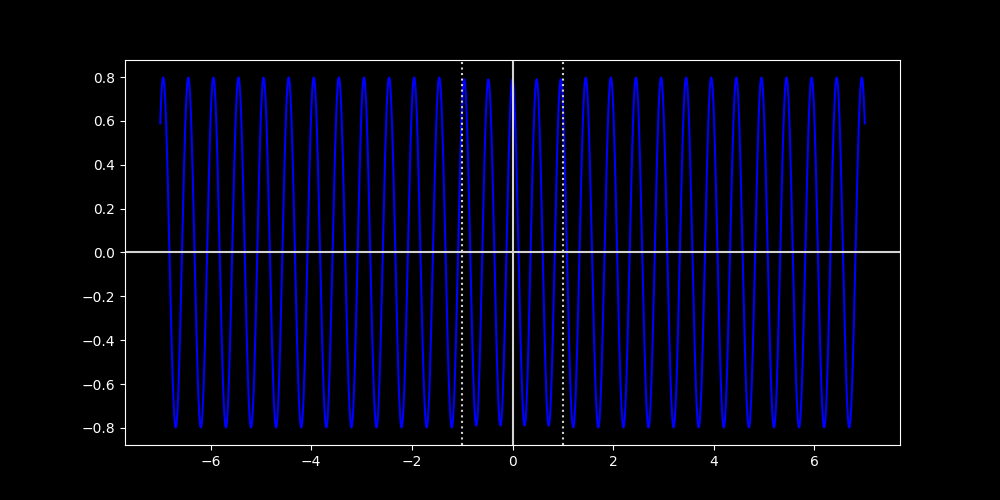

In [27]:
A.radiation_mode_beta_animation('beta_animation_imag_type', beta_range=[0,12], imag_type=True, figsize=(10,5))

In [28]:
from IPython.display import HTML


HTML("""
<video alt="test" controls id="theVideo">
        <source src="beta_animation_imag_type.mp4" type="video/mp4">
</video>

<script>
video = document.getElementById("theVideo")
video.playbackRate = .5;
</script>
""")

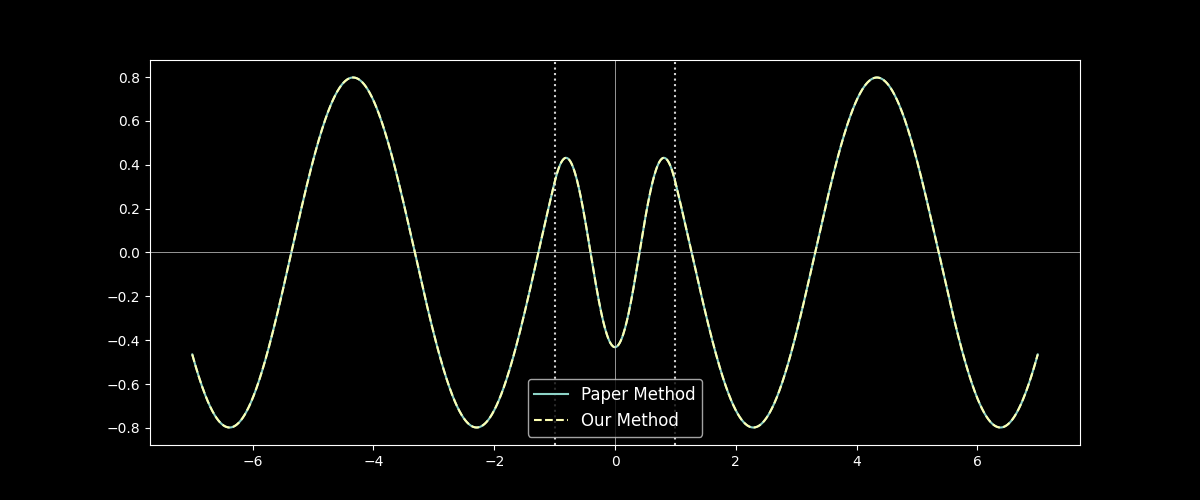

In [32]:
F_paper = A.fields_Z(Z, mode_type='radiation', paper_method=True)
F_ours = A.fields_Z(Z, mode_type='radiation', paper_method=False)

fig, ax = A.plot_field_1d(F_paper, label='Paper Method');
A.add_1d_plot(F_ours, ax=ax, label='Our Method', linestyle='--');